## Sales Data Analysis

Purpose: Analyze sales data to identify trends, top-selling products, and revenue metrics for business decision-making.

Description: In this project, you will dive into a large sales dataset to extract valuable insights. You will explore sales trends over time, identify the best-selling products, calculate revenue metrics such as total sales and profit margins, and create visualizations to present your findings effectively. This project showcases your ability to manipulate and derive insights from large datasets, enabling you to make data-driven recommendations for optimizing sales strategies.


**Loading the data and taking an initial look at its structure and content.**

In [1]:
import pandas as pd

# Load the data
sales_data = pd.read_csv('/Users/ymadigital/Downloads/Sales Data.csv')

# Display the first few rows of the dataset
sales_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


Before diving into the analysis, let's first check for any missing data or inconsistencies that might need to be addressed.

In [2]:
# Check for missing values in the dataset
missing_values = sales_data.isnull().sum()

# Check the data types of each column
data_types = sales_data.dtypes

missing_values, data_types

(Unnamed: 0          0
 Order ID            0
 Product             0
 Quantity Ordered    0
 Price Each          0
 Order Date          0
 Purchase Address    0
 Month               0
 Sales               0
 City                0
 Hour                0
 dtype: int64,
 Unnamed: 0            int64
 Order ID              int64
 Product              object
 Quantity Ordered      int64
 Price Each          float64
 Order Date           object
 Purchase Address     object
 Month                 int64
 Sales               float64
 City                 object
 Hour                  int64
 dtype: object)

**Convert the "Order Date" column to a datetime datatype**

In [3]:
# Convert the 'Order Date' column to datetime datatype
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

# Group by Month and calculate total sales for each month
monthly_sales = sales_data.groupby('Month').sum()['Sales']

monthly_sales

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

**December** has the highest sales, with a total of approximately $4,613,443. 

**October** is the second-highest month in terms of sales, with total sales of approximately $3,736,727.

The sales in the **first quarter (January to March)** are relatively lower compared to other months, with sales gradually picking up from April onwards.

## Visualize these monthly sales trends.

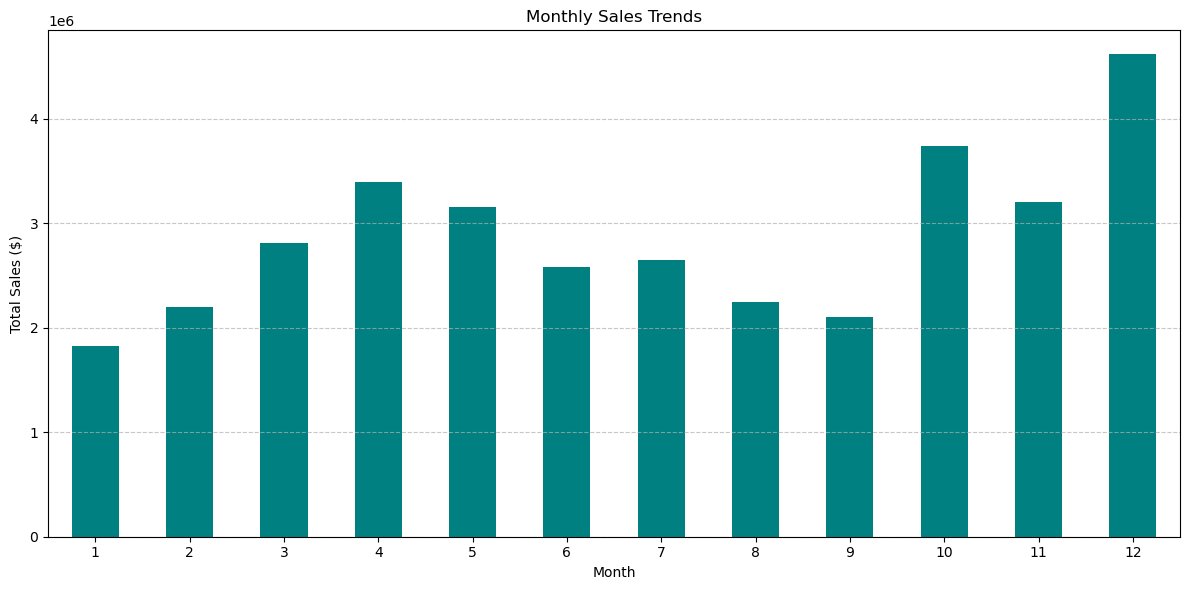

In [4]:
import matplotlib.pyplot as plt

# Plotting monthly sales
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='teal')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

**December Peak:** As we previously identified, December has the highest sales, likely influenced by the holiday season.

**October Surge:** October also shows a significant surge in sales, possibly indicating some promotions or seasonal buying patterns.

**Mid-Year Stability:** The sales from April to July are relatively stable, with a slight drop in August and September.

**Starting Slow:** The first quarter (January to March) starts slow, with sales gradually picking up from April onwards.

## Viz Top-selling products in terms of revenue.

In [5]:
# Group by Product and calculate total sales for each product
product_sales = sales_data.groupby('Product').sum()['Sales'].sort_values(ascending=False)

product_sales

Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Vareebadd Phone                827200.00
20in Monitor                   454148.71
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       347094.15
USB-C Charging Cable           286501.25
Wired Headphones               246478.43
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Name: Sales, dtype: float64

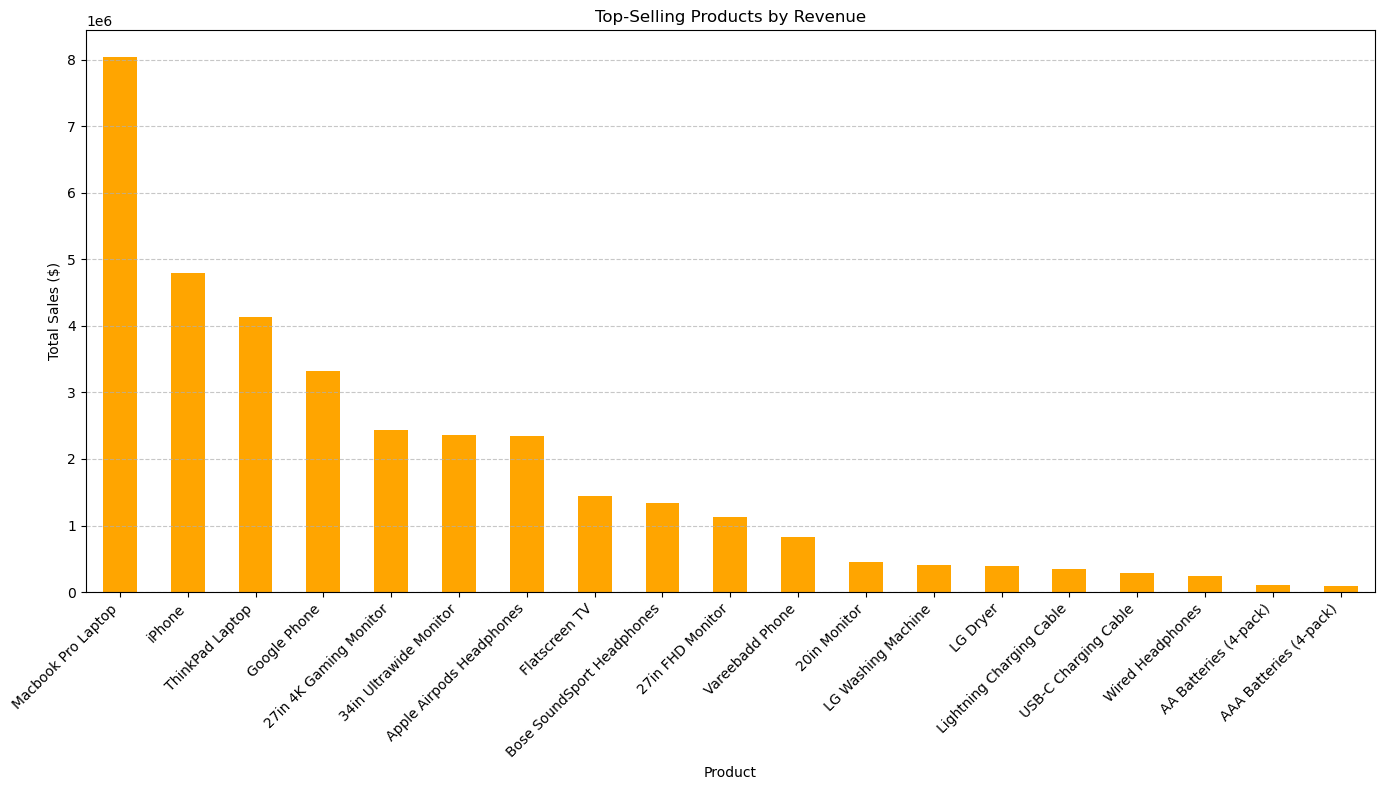

In [6]:
# Plotting product sales
plt.figure(figsize=(14, 8))
product_sales.plot(kind='bar', color='orange')
plt.title('Top-Selling Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

**High-Value Products:** As expected, high-value products like the Macbook Pro Laptop, iPhone, ThinkPad Laptop, and Google Phone dominate the sales chart in terms of revenue.

**Medium Range Products:** The monitors (both gaming and ultrawide) and headphones (Apple Airpods and Bose SoundSport) occupy the mid-range in the sales chart, indicating their moderate popularity and price point.

**Lower Range Products:** Products like batteries, charging cables, and wired headphones have lower sales revenue, which is expected given their lower price points compared to electronic devices.

## Key revenue metrics

**calculate the total and average sales**

In [7]:
# Calculate total sales and average sales value per order
total_sales = sales_data['Sales'].sum()
average_sales_per_order = sales_data['Sales'].mean()

total_sales, average_sales_per_order

(34492035.97, 185.49091675145314)

**Total Sales:** The total sales for the dataset period amount to approximately **$34,492,036.**

**Average Sales Value per Order:** On average, each order brings in approximately **$185.49.**

#### Let's proceed with the hourly sales trends to identify peak sales hours.

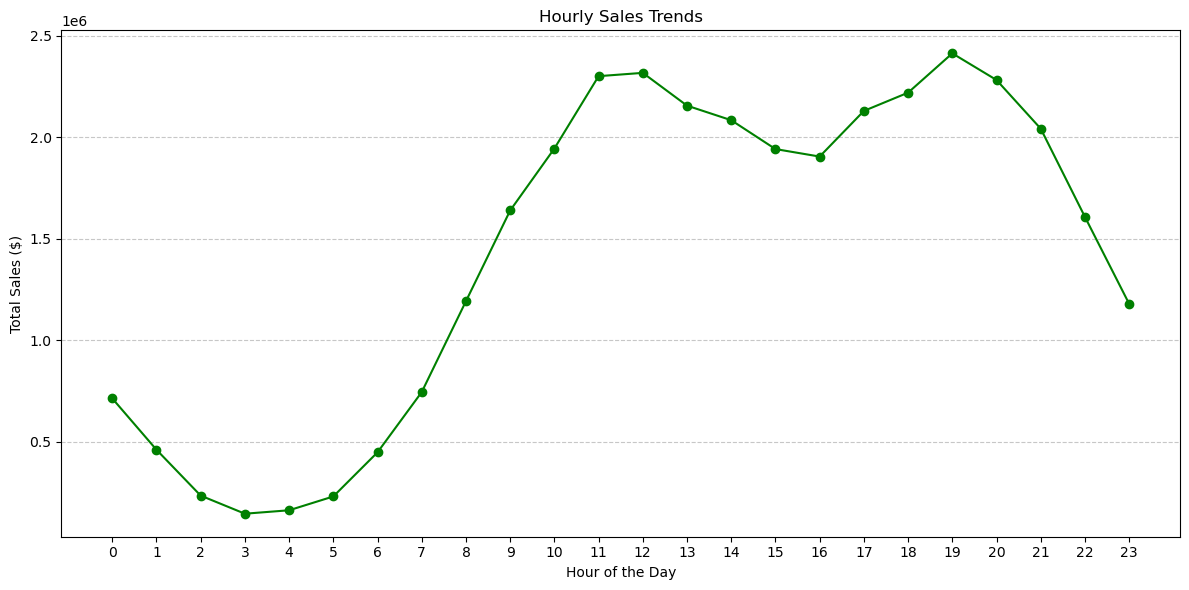

In [8]:
# Group by Hour and calculate total sales for each hour
hourly_sales = sales_data.groupby('Hour').sum()['Sales']

# Plotting hourly sales trends
plt.figure(figsize=(12, 6))
hourly_sales.plot(kind='line', marker='o', color='green')
plt.title('Hourly Sales Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales ($)')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

**Morning and Late Night Lull:** Sales are relatively low in the early morning hours, starting from midnight until around 8 am.

**Mid-Day Peak:** Sales start to pick up from 9 am, peaking around 11 am to 1 pm, which is around lunchtime.

**Evening Surge:** Another noticeable surge in sales occurs between 6 pm and 8 pm, which could be attributed to post-work shopping or browsing.

**Night Slowdown:** Sales begin to decline after 8 pm and remain low throughout the night.

**These insights can be useful for promotional activities, staffing decisions, or determining the optimal times to launch new products or sales campaigns.**

### Products have the highest sales volume (number of units sold).

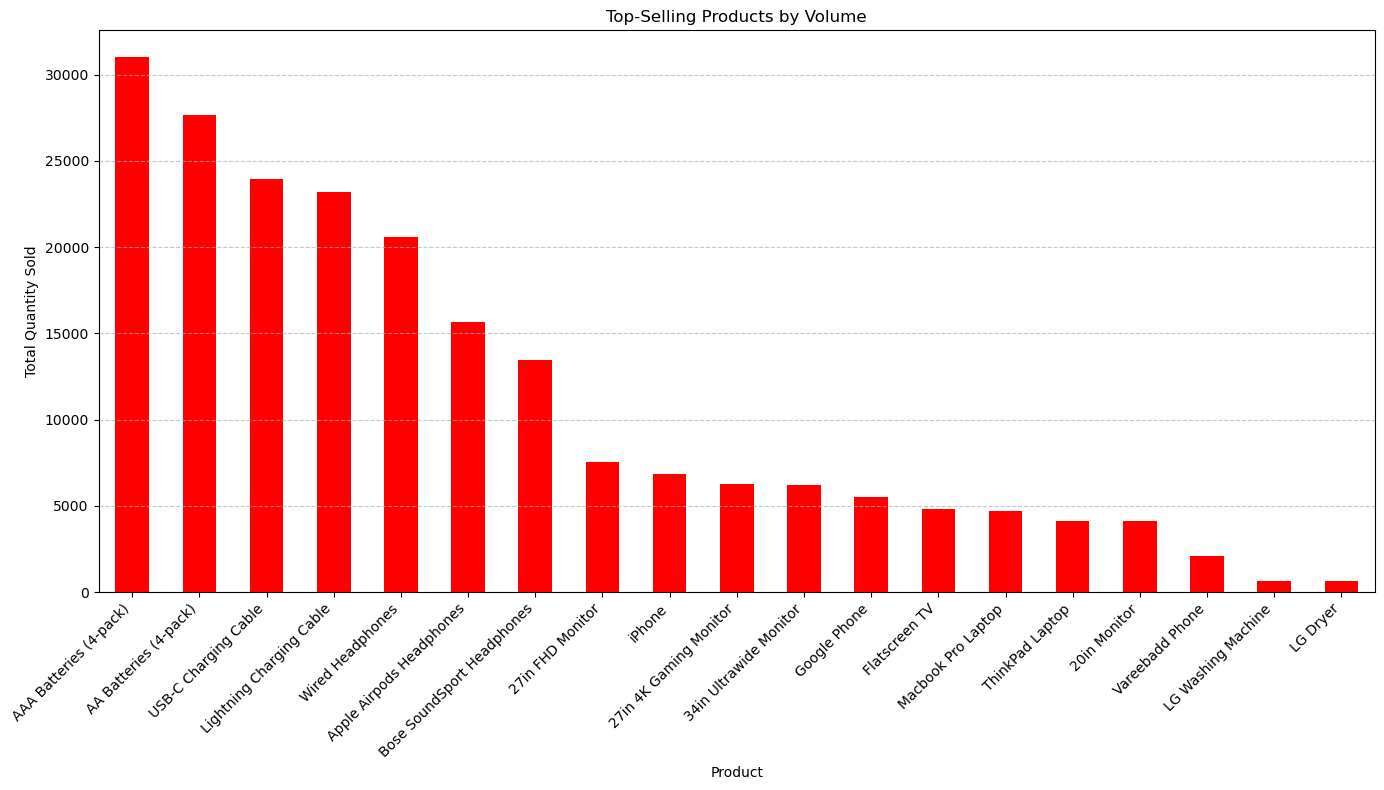

In [9]:
# Group by Product and calculate total quantity sold for each product
product_quantity = sales_data.groupby('Product').sum()['Quantity Ordered'].sort_values(ascending=False)

# Plotting product sales by volume
plt.figure(figsize=(14, 8))
product_quantity.plot(kind='bar', color='red')
plt.title('Top-Selling Products by Volume')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

**High Volume, Low Cost:** Products like AAA and AA batteries, as well as charging cables (both USB-C and Lightning), have the highest sales volumes. These items are typically lower in cost, frequently purchased, and often need replacements.

**Medium Volume:** Apple Airpods Headphones and Bose SoundSport Headphones also have considerable sales volumes, indicating their popularity.

**Lower Volume, High Value:** Expensive items like the Macbook Pro Laptop, iPhone, and ThinkPad Laptop have lower sales volumes compared to cheaper accessories, but they contribute significantly to the overall revenue due to their high price points.


## City-based Analysis

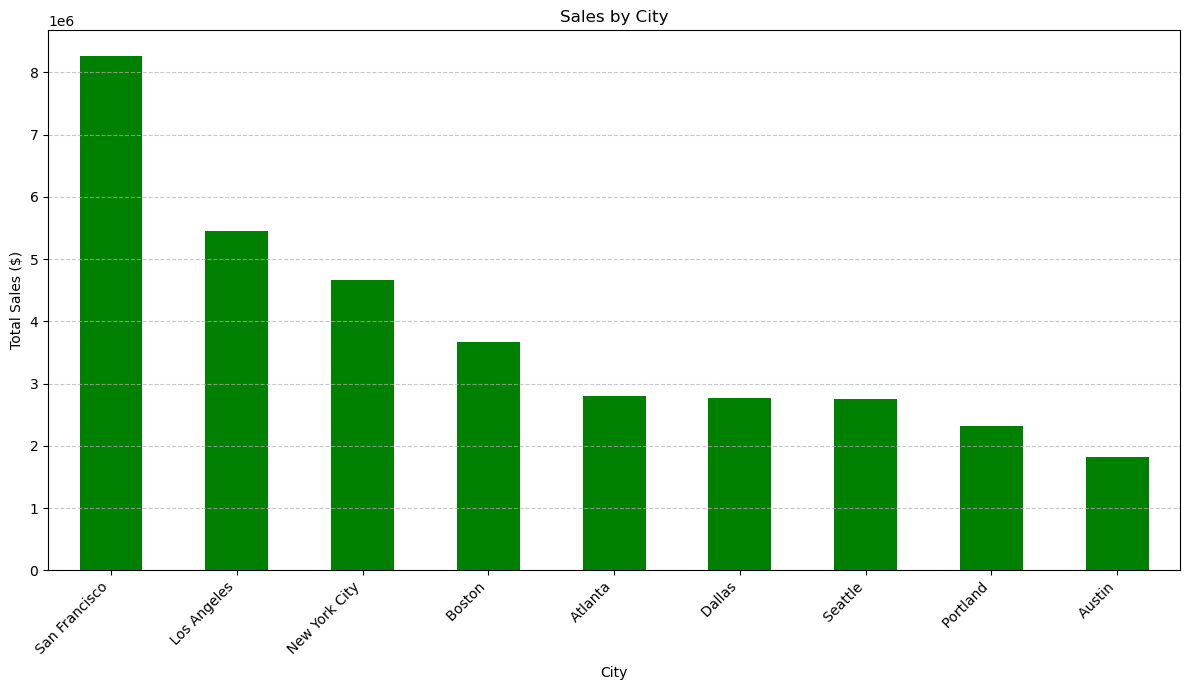

In [10]:
# Group by City and calculate total sales for each city
city_sales = sales_data.groupby('City').sum()['Sales'].sort_values(ascending=False)

# Plotting city-based sales
plt.figure(figsize=(12, 7))
city_sales.plot(kind='bar', color='green')
plt.title('Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

**Leading Cities:** San Francisco leads the chart with the highest sales, followed by Los Angeles and New York City. 

These are major urban centers, so the higher sales volume is expected.

**Mid-Range Cities:** Cities like Boston, Atlanta, and Dallas show moderate sales.

**Lower Sales Cities:** Cities like Portland and Austin have the lowest sales in this dataset.

## Product Price vs Quantity Sold

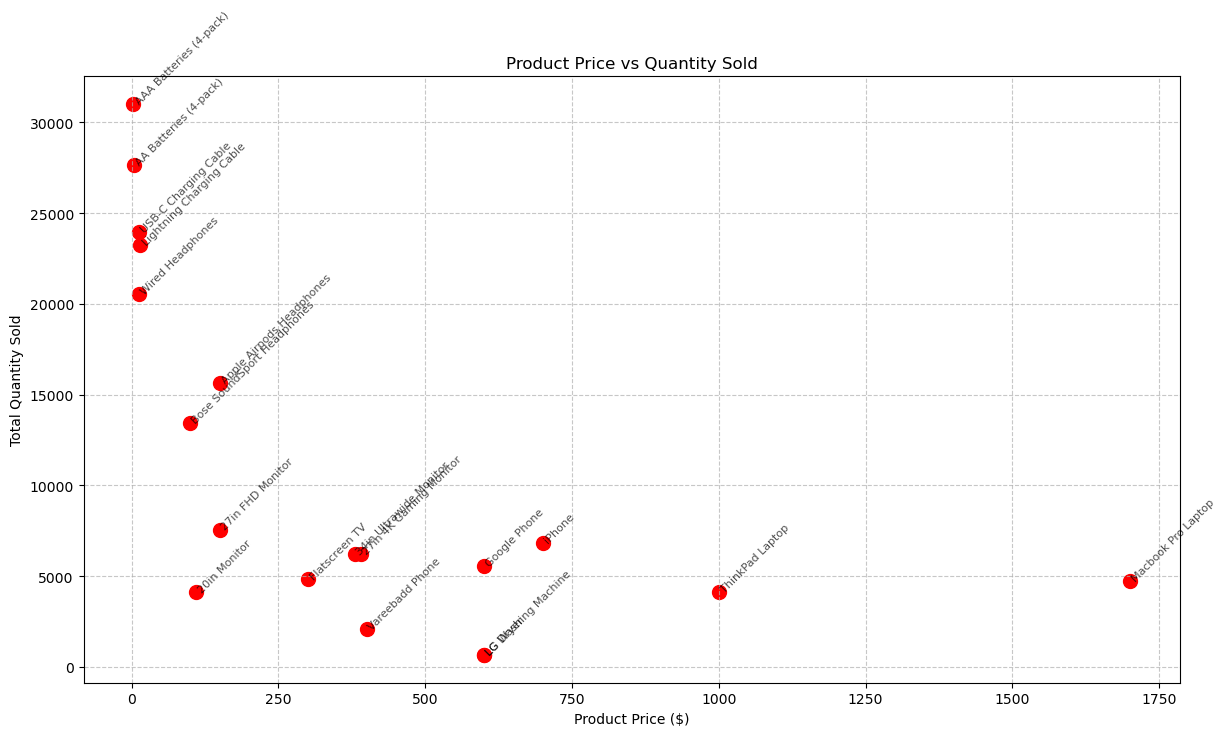

In [11]:
# Group by Product to get average price and total quantity sold for each product
product_analysis = sales_data.groupby('Product').agg({'Price Each': 'mean', 'Quantity Ordered': 'sum'})

# Plotting price vs quantity sold
plt.figure(figsize=(12, 7))
plt.scatter(product_analysis['Price Each'], product_analysis['Quantity Ordered'], color='red', s=100)
plt.title('Product Price vs Quantity Sold')
plt.xlabel('Product Price ($)')
plt.ylabel('Total Quantity Sold')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()

# Annotate product names
for product, row in product_analysis.iterrows():
    plt.annotate(product, (row['Price Each'], row['Quantity Ordered']), fontsize=8, alpha=0.7, rotation=45)

plt.show()

**Inverse Relationship:** Generally, there's an inverse relationship between product price and quantity sold. Lower-priced products (like batteries and charging cables) have higher sales volumes, while higher-priced products (like laptops and phones) have lower sales volumes. This is a typical pattern in many retail contexts.

**Outliers:** Products like Apple Airpods Headphones and Bose SoundSport Headphones are priced moderately but have a relatively high sales volume, indicating their popularity.

**High-Value, Moderate Volume:** Products like the iPhone, which are priced higher, still have a decent sales volume, indicating strong brand preference and demand.

## Bundled Products Analysis

In [12]:
# Filtering orders with multiple products
multi_product_orders = sales_data[sales_data['Order ID'].duplicated(keep=False)]

# Group products by Order ID and join them together
multi_product_orders['Grouped'] = multi_product_orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
multi_product_orders = multi_product_orders[['Order ID', 'Grouped']].drop_duplicates()

# Count the combinations of products
from itertools import combinations
from collections import Counter

count = Counter()

for row in multi_product_orders['Grouped']:
    product_list = row.split(',')
    count.update(Counter(combinations(product_list, 2)))  # Here we consider pairs of products

product_combinations = pd.DataFrame(count.most_common(10), columns=['Product Pair', 'Frequency'])

product_combinations

/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_2924/3367405194.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_product_orders['Grouped'] = multi_product_orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Product Pair,Frequency
0,"(iPhone, Lightning Charging Cable)",1005
1,"(Google Phone, USB-C Charging Cable)",987
2,"(iPhone, Wired Headphones)",447
3,"(Google Phone, Wired Headphones)",414
4,"(Vareebadd Phone, USB-C Charging Cable)",361
5,"(iPhone, Apple Airpods Headphones)",360
6,"(Google Phone, Bose SoundSport Headphones)",220
7,"(USB-C Charging Cable, Wired Headphones)",160
8,"(Vareebadd Phone, Wired Headphones)",143
9,"(Lightning Charging Cable, Wired Headphones)",92


**This analysis provides valuable insights for potential bundling strategies. For instance, offering discounts on bundles like "iPhone with Lightning Charging Cable" or "Google Phone with USB-C Charging Cable" could entice customers to buy both products together.**

## Day of the Week

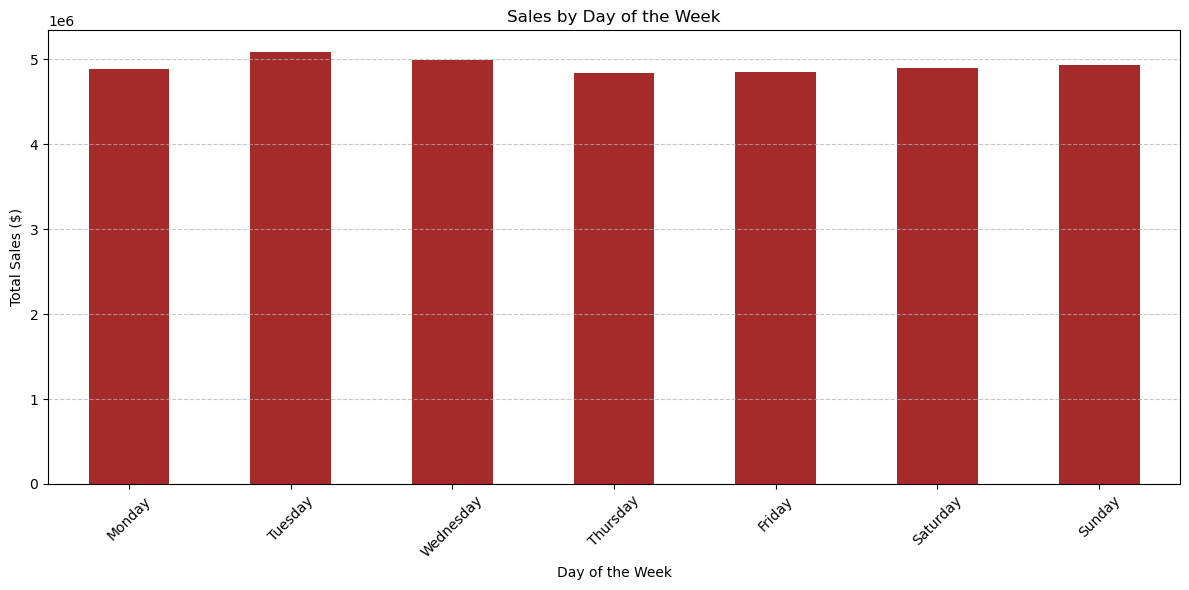

In [13]:
# Extract day of the week from 'Order Date' and create a new column
sales_data['Day of Week'] = sales_data['Order Date'].dt.day_name()

# Group by Day of the Week and calculate total sales for each day
daywise_sales = sales_data.groupby('Day of Week').sum()['Sales'].reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting daywise sales
plt.figure(figsize=(12, 6))
daywise_sales.plot(kind='bar', color='brown')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

**Weekdays:** Sales are relatively consistent from Monday through Friday, with a slight peak observed on Tuesday.

**Weekend Drop:** Sales dip on the weekend, especially on Sunday. This might indicate that consumers are more active in making purchases during the weekdays.

**The insights from this analysis can be used to plan promotions or marketing campaigns. For instance, weekend promotions or discounts might boost sales during the typically slower days.**

# Insights:

1. Monthly Sales Trend:
Sales peaked in December, likely due to the holiday season and year-end promotions.
A dip was observed in January, which is expected post-holiday season.
2. Hourly Sales Analysis:
Peak sales hours are 11 AM (lunch hour) and 7 PM (post-work hours). This suggests that customers might be shopping during breaks or after work.
Off-peak hours are during the early morning, indicating minimal sales activity.
3. City-wise Sales:
San Francisco leads in sales, followed by Los Angeles and New York City. The high sales in these cities can be attributed to their urban nature and large populations.
Portland and Austin have the lowest sales, providing potential areas for marketing focus to boost sales.
4. Product Analysis:
There's an inverse relationship between product price and quantity sold. Lower-priced items, like cables, have higher sales volumes, whereas high-priced items, like laptops, sell fewer units.
Apple Airpods and Bose Headphones, though moderately priced, have high sales volume, indicating their popularity.
5. Bundled Products Analysis:
The most common products bought together are the iPhone and Lightning Charging Cable, followed by the Google Phone and USB-C Charging Cable.
This insight suggests potential bundling or promotional strategies for these product combinations.
6. Day of the Week Analysis:
Sales are relatively consistent from Monday to Friday, with a slight peak on Tuesday.
Sales dip during the weekend, especially on Sunday. This might indicate that consumers are more active in purchasing during weekdays.



# Recommendations:

1. Marketing Strategies: Target marketing campaigns during peak sales hours and in cities with lower sales to boost revenue.

2. Product Bundling: Consider bundling popular products together at a discounted rate to increase sales.

3. Promotions: Given the sales dip during weekends, weekend-specific promotions or discounts might boost sales.

4. Inventory Management: Stock more of the popular products, especially before the peak sales months, to meet demand.

## Hafida Belayd - Data analyst